This is just a quick teaser of how easy it can be to create interesting results with some freely available deep learning code.

We're going to use Tensorflow Hub to load a pretrained BigGAN image generator network and produce some images with it.

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # comment this out if your tensorflow works ok with GPU
import tensorflow as tf
import tensorflow_hub as hub

W0404 19:35:10.947552 12072 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [6]:
# BigGAN-deep models. The 128x128 pixel models are the fastest to run without a beefy GPU
# Uncomment the one you want to test.
module_path = 'https://tfhub.dev/deepmind/biggan-deep-128/1'  # 128x128 BigGAN-deep
# module_path = 'https://tfhub.dev/deepmind/biggan-deep-256/1'  # 256x256 BigGAN-deep
# module_path = 'https://tfhub.dev/deepmind/biggan-deep-512/1'  # 512x512 BigGAN-deep
# BigGAN (original) models
# module_path = 'https://tfhub.dev/deepmind/biggan-128/2'  # 128x128 BigGAN
# module_path = 'https://tfhub.dev/deepmind/biggan-256/2'  # 256x256 BigGAN
# module_path = 'https://tfhub.dev/deepmind/biggan-512/2'  # 512x512 BigGAN

print("Loading BigGAN module")
module = hub.Module(module_path)

print("Making things ready for sampling")
# Sample random noise (z) and ImageNet label (y) inputs.
batch_size = 4
truncation = 0.5  # scalar truncation value in [0.02, 1.0]
z = truncation * tf.random.truncated_normal([batch_size, 128])  # noise sample
y_index = 418*tf.ones([batch_size],dtype=tf.int32) #tf.random.uniform([batch_size], maxval=1000, dtype=tf.int32)
y = tf.one_hot(y_index, 1000)  # one-hot ImageNet label

# Call BigGAN on a dict of the inputs to generate a batch of images with shape
# [8, 128, 128, 3] and range [-1, 1].
samples = module(dict(y=y, z=z, truncation=truncation))
sess=tf.Session()
tf.global_variables_initializer().run(session=sess)
#pp.show()


Loading BigGAN module
Making things ready for sampling
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0404 19:41:02.086994 12072 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


W0404 19:39:58.527713 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.546266 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.566818 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.588738 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.610794 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.633863 12072 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 19:39:58.660928 12072 image.py:656] Clipping input data to the valid range for ims

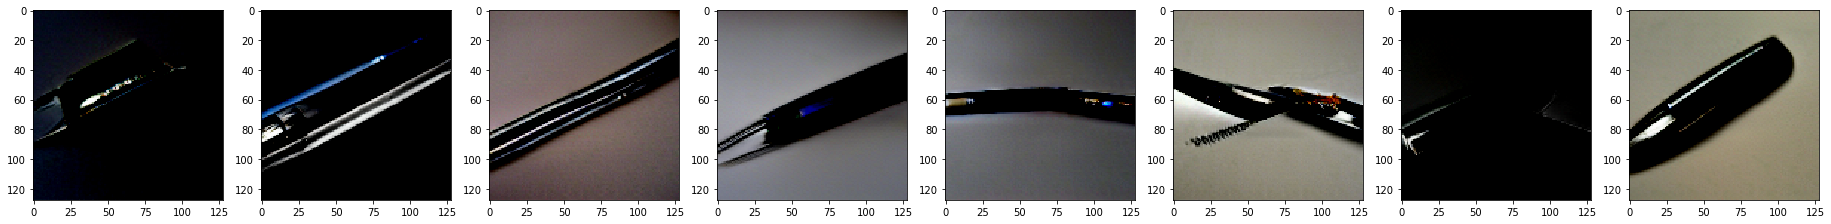

In [5]:
samples_fetched=sess.run(samples)
pp.figure(1,figsize=[batch_size*4,4])
for i in range(batch_size):
    pp.subplot(1,batch_size,1+i)
    pp.imshow(samples_fetched[i])